In [24]:
churn_features_df

CLIENT_ID_SAP,HAS_EMAIL,HAS_SMS,HAS_VKL,CHURN,TOTAL_TRANSACTIONS,TOTAL_SPENT,AVG_TRANSACTION_VALUE,FUEL_TRANSACTIONS_COUNT,NON_FUEL_TRANSACTIONS_COUNT,TOTAL_FUEL_LITERS,ACTIVE_MONTHS,TRANSACTION_COUNT_VOLATILITY,AVG_MONTHLY_TRANSACTIONS,LAST_MONTH_TRANSACTIONS,LAST_MONTH_SPENT,LAST_MONTH_FUEL_TRANS,LAST_3M_TRANSACTION_COUNT,LAST_3M_TOTAL_SPENT,LAST_3M_AVG_TRANSACTION,LAST_3M_AVG_TRANSACTIONS,LAST_3M_AVG_SPENT,RECENT_TRANSACTION_TREND,RECENT_SPENDING_TREND,AVG_GAP_BETWEEN_ACTIVE_MONTHS,MAX_GAP_BETWEEN_ACTIVE_MONTHS,CUSTOMER_TENURE_DAYS,MONTHS_SINCE_LAST_ACTIVITY,MONTHLY_ACTIVITY_DENSITY,RECENT_VS_HISTORICAL_ACTIVITY,RECENT_VS_HISTORICAL_SPENDING,PERCENT_TRANSACTION_TREND,PERCENT_SPENDING_TREND,IS_NEW_CUSTOMER,IS_MID_TENURE_CUSTOMER,IS_ESTABLISHED_CUSTOMER,TREND_RELIABILITY,NORMALIZED_VOLATILITY,LAST_MONTH_TRANSACTIONS_Z_SCORE,HAS_IRREGULAR_ACTIVITY,HAS_RECENT_INACTIVITY,IS_CONSISTENT_CUSTOMER,MAX_RECENT_INACTIVITY_PERIOD,FUEL_TRANSACTION_PERCENTAGE,NON_FUEL_TRANSACTION_PERCENTAGE,AVG_FUEL_LITERS_PER_TRANSACTION,RECENT_FUEL_PURCHASE_TREND
u32,i8,i8,i8,i32,u32,f64,f64,i64,u32,f64,u32,f64,f64,u32,f64,i64,u32,f64,f64,f64,f64,f64,f64,f64,i32,i64,i32,f64,f64,f64,f64,f64,i8,i8,i8,f64,f64,f64,i8,i8,i8,i32,f64,f64,f64,f64
7713274081,1,1,1,0,35,65240.824,1864.023543,34,6,1260.23,6,0.816497,3.333333,4,8092.0,4,11,21385.75,1944.159091,3.666667,7128.583333,1.0,1136.8725,0.2,4,301,0,0.6,1.1,0.655594,27.272727,15.948085,0,1,0,0.5,0.244949,0.666667,0,0,0,4,97.142857,17.142857,37.065588,0.705882
8813338581,1,1,1,0,10,17309.75,1730.975,9,4,265.0,3,1.0,2.0,2,3786.5,2,3,4911.5,1637.166667,1.0,1637.166667,4.2950e9,-1654.5,-1.0,3,258,0,0.333333,0.5,0.283742,4.2950e11,-101.05874,0,1,0,0.25,0.5,0.0,0,0,0,3,90.0,40.0,29.444444,0.666667
7712459552,1,1,1,0,34,52074.382,1531.599471,33,1,1037.8,5,1.516575,2.6,2,3565.926,2,7,10031.541,1433.077286,2.333333,3343.847,2.0,2384.643,-0.25,5,504,0,0.294118,0.897436,0.321064,85.714286,71.314357,0,1,0,0.416667,0.583298,-0.395628,0,0,0,5,97.058824,2.941176,31.448485,0.30303
8813062265,1,1,1,0,60,66478.4995,1107.974992,60,0,1214.51,6,7.456541,6.0,21,27718.118,21,25,30976.1375,1239.0455,8.333333,10325.379167,1.4317e9,-613.681333,-0.4,3,370,0,0.461538,1.388889,0.931914,1.7180e10,-5.943427,0,1,0,0.5,1.242757,2.011657,0,0,0,3,100.0,0.0,20.241833,2.1
7708889592,1,1,1,1,12,13392.5735,1116.047792,9,3,241.31,5,0.547723,1.4,1,1999.8615,1,4,4508.429,1127.10725,1.333333,1502.809667,0.0,257.0475,-0.5,4,416,13,0.357143,0.952381,0.561061,0.0,17.104461,0,1,0,0.416667,0.39123,-0.4,0,1,0,4,75.0,25.0,26.812222,0.555556
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
8812347728,1,1,1,1,34,17666.0375,519.589338,34,0,337.77,6,2.949576,3.5,9,4230.8855,9,13,6468.5055,497.577346,4.333333,2156.1685,1.4317e9,660.6285,-0.8,3,311,7,0.545455,1.238095,0.73231,3.3038e10,30.639002,0,1,0,0.5,0.842736,1.864675,0,1,0,3,100.0,0.0,9.934412,1.588235
7712743719,1,1,1,0,50,63786.157,1275.72314,50,1,1268.3,6,1.36626,3.666667,4,5680.613,4,11,14853.1155,1350.283227,3.666667,4951.0385,1.4317e9,393.511,-0.2,4,457,0,0.375,1.0,0.465716,3.9045e10,7.94805,0,1,0,0.5,0.372616,0.243975,0,0,0,4,100.0,2.0,25.366,0.48
8811646324,0,0,1,1,10,14177.923,1417.7923,10,1,291.31,4,2.0,2.0,1,2612.203,1,2,4611.787,2305.8935,0.666667,1537.262333,0.0,590.6015,-1.333333,1,212,12,0.5,0.333333,0.433706,0.0,38.419045,0,1,0,0.333333,1.0,-0.5,0,1,0,1,100.0,10.0,29.131,0.4


# BiGRU for churn prediction with automatic threshold selection

Запуск BiGRU модели для предсказания оттока на основе churn_features_df
Используемые признаки: ['HAS_EMAIL', 'HAS_SMS', 'HAS_VKL', 'AVG_TRANSACTION_VALUE', 'NON_FUEL_TRANSACTIONS_COUNT', 'TRANSACTION_COUNT_VOLATILITY', 'AVG_MONTHLY_TRANSACTIONS', 'LAST_MONTH_TRANSACTIONS', 'LAST_MONTH_SPENT', 'LAST_MONTH_FUEL_TRANS', 'LAST_3M_TRANSACTION_COUNT', 'LAST_3M_TOTAL_SPENT', 'LAST_3M_AVG_TRANSACTION', 'LAST_3M_AVG_TRANSACTIONS', 'LAST_3M_AVG_SPENT', 'RECENT_TRANSACTION_TREND', 'RECENT_SPENDING_TREND', 'AVG_GAP_BETWEEN_ACTIVE_MONTHS', 'MAX_GAP_BETWEEN_ACTIVE_MONTHS', 'MONTHLY_ACTIVITY_DENSITY', 'RECENT_VS_HISTORICAL_ACTIVITY', 'RECENT_VS_HISTORICAL_SPENDING', 'PERCENT_TRANSACTION_TREND', 'PERCENT_SPENDING_TREND', 'IS_NEW_CUSTOMER', 'IS_MID_TENURE_CUSTOMER', 'IS_ESTABLISHED_CUSTOMER', 'TREND_RELIABILITY', 'NORMALIZED_VOLATILITY', 'LAST_MONTH_TRANSACTIONS_Z_SCORE', 'HAS_IRREGULAR_ACTIVITY', 'IS_CONSISTENT_CUSTOMER', 'MAX_RECENT_INACTIVITY_PERIOD', 'FUEL_TRANSACTION_PERCENTAGE', 'NON_FUEL_TRANSAC

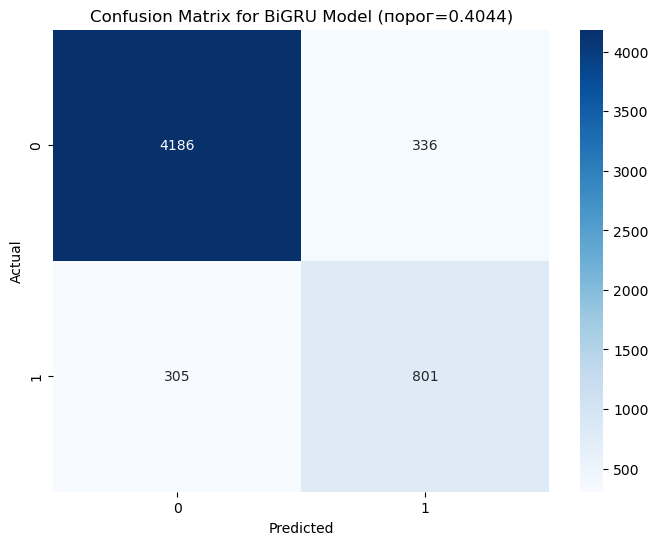

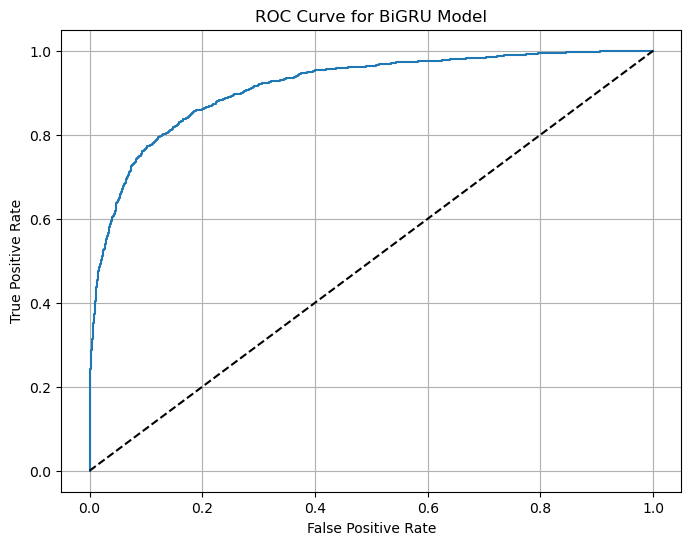

In [30]:
df_pd = churn_features_df.to_pandas()

# Define columns not used as features.
exclude_cols = [
    "CHURN", "CLIENT_ID_SAP", "HAS_RECENT_INACTIVITY", "LATEST_TRANSACTION_DATE", "LAST_ACTIVE_MONTH", "MONTHS_SINCE_LAST_ACTIVITY",
    "ACTIVE_MONTHS", "MONTHS_AT_LEVEL", "CUSTOMER_TENURE_DAYS", "TOTAL_SPENT",
    "TOTAL_FUEL_LITERS", "TOTAL_TRANSACTIONS", "FUEL_TRANSACTIONS_COUNT", "LAST_TRANSACTION_DATE", "FIRST_ACTIVE_MONTH", "FIRST_TRANSACTION_DATE"
]
features_cols = [col for col in df_pd.columns if col not in exclude_cols]

# Separate features and target variable
X = df_pd[features_cols]
y = df_pd["CHURN"]

print(f"Features used: {features_cols}")
print(f"Shape of X: {X.shape}, shape of y: {y.shape}")

# Fill potential missing values with zeros
X = X.fillna(0)
y = y.fillna(0)

# Split data with stratification (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# If NaNs remain after scaling, replace them with zeros
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0)
X_test_scaled  = np.nan_to_num(X_test_scaled, nan=0.0)

print("Are there any NaNs in X_train_scaled?", np.isnan(X_train_scaled).any())

# Add a dummy sequence dimension (seq_len=1) for GRU input
X_train_seq = np.expand_dims(X_train_scaled, axis=1)  # [n_samples, 1, n_features]
X_test_seq  = np.expand_dims(X_test_scaled, axis=1)   # [n_samples, 1, n_features]

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test_seq, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor  = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoaders
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader   = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Set device (CUDA if available, otherwise CPU or MPS for Apple Silicon)
# For debugging, CPU or MPS can be used if MPS is stable, otherwise CPU.
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

# BiGRU Model Definition
class ChurnBiGRU(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=1, dropout=0.3):
        """
        input_size: number of features per time step (e.g., len(features_cols))
        hidden_size: size of the GRU hidden state
        num_layers: number of GRU layers
        dropout: dropout rate after GRU
        """
        super(ChurnBiGRU, self).__init__()
        # Bidirectional GRU layer
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,  # Input and output tensors are provided as (batch, seq, feature)
            bidirectional=True # Makes the GRU bidirectional
        )
        # Dropout layer
        self.dropout = nn.Dropout(dropout)
        # Output layer: hidden state size will be hidden_size * 2 (due to bidirectionality)
        self.fc = nn.Linear(hidden_size * 2, 1)  # logits for binary classification
        
    def forward(self, x):
        # x shape: [batch, seq_len, input_size]
        gru_out, _ = self.gru(x)  # gru_out shape: [batch, seq_len, hidden_size*2]
        
        # We take the output of the last time step. 
        # For batch_first=True, gru_out is (batch, seq, num_directions * hidden_size)
        last_output = gru_out[:, -1, :]  # take the output of the last time step
        
        out = self.dropout(last_output)
        logits = self.fc(out)  # output shape: [batch, 1]
        return logits

# Initialize model, loss, and optimizer
n_features = X_train_tensor.size(2) # Number of features
model = ChurnBiGRU(input_size=n_features, hidden_size=50, num_layers=1, dropout=0.3)
model.to(device)
print(model)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total trainable parameters:", total_params)

criterion = nn.BCEWithLogitsLoss() # Binary Cross-Entropy with Logits Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Evaluation Functions
def train_epoch(model, loader, criterion, optimizer):
    model.train() # Set model to training mode
    total_loss = 0.0
    for i, (inputs, labels) in enumerate(loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        logits = model(inputs).squeeze(-1) # Squeeze to match label shape for BCEWithLogitsLoss
        
        # Check for NaNs in logits or labels before loss calculation
        if torch.isnan(logits).any():
            print(f"Batch {i}: logits contain NaN, skipping this batch.")
            continue
        if torch.isnan(labels).any():
            print(f"Batch {i}: labels contain NaN, skipping this batch.")
            continue
            
        loss = criterion(logits, labels.squeeze()) # Squeeze labels as well
        
        if torch.isnan(loss):
            print(f"Batch {i}: loss is NaN, skipping this batch.")
            continue
            
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # Gradient clipping
        optimizer.step()
        
        total_loss += loss.item() * inputs.size(0)
    return total_loss / len(loader.dataset)

def evaluate(model, loader, criterion):
    model.eval() # Set model to evaluation mode
    total_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad(): # Disable gradient calculations
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            logits = model(inputs).squeeze(-1)
            loss = criterion(logits, labels.squeeze())
            total_loss += loss.item() * inputs.size(0)
            
            probs = torch.sigmoid(logits) # Convert logits to probabilities
            all_preds.append(probs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
            
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    return total_loss / len(loader.dataset), all_preds, all_labels

# Training Loop with Early Stopping
num_epochs = 30
patience = 5 # Number of epochs to wait for improvement before stopping
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    val_loss, val_preds, val_labels = evaluate(model, test_loader, criterion)
    
    # Calculate validation accuracy using a 0.5 threshold for logging purposes
    val_acc = accuracy_score(val_labels, (val_preds > 0.5).astype(int)) 
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f} | Val Acc: {val_acc:.4f}")
    
    if not np.isnan(val_loss) and val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict().copy() # Save the best model state
        patience_counter = 0 # Reset patience counter
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1} due to no improvement in validation loss.")
            if best_model_state is not None:
                model.load_state_dict(best_model_state) # Load the best model state
            break

# Final Evaluation with Automatic Threshold Selection
model.eval() # Ensure model is in evaluation mode
test_loss, test_preds, test_labels = evaluate(model, test_loader, criterion)

# Find the optimal threshold based on the precision-recall curve to maximize F1-score
precisions, recalls, thresholds = precision_recall_curve(test_labels, test_preds)
# Add a small epsilon to avoid division by zero if precision and recall are both zero
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8) 
best_threshold_idx = np.argmax(f1_scores)
# thresholds array can be one element shorter than precisions/recalls
# If best_threshold_idx is out of bounds for thresholds, adjust or use a default.
# Typically, thresholds[i] is the threshold for precisions[i+1] and recalls[i+1].
# Or, it's often len(thresholds) == len(f1_scores) -1 or len(f1_scores).
# Opt for thresholds[best_threshold_idx] if lengths match, or handle mismatch.
# For precision_recall_curve, len(thresholds) = len(precisions) - 1 = len(recalls) - 1
# F1 scores are calculated for each threshold, so len(f1_scores) can be len(precisions)
# We need to ensure best_threshold_idx is valid for thresholds array.
# If f1_scores includes an F1 for "no classification" (threshold doesn't exist), adjust.
# However, np.argmax(f1_scores) will give an index into f1_scores.
# If f1_scores are computed for each point on PR curve, then it aligns with precisions/recalls.
# thresholds are the decision thresholds used to compute precision and recall.
# The last precision and recall values are 1. and 0. respectively and do not have a corresponding threshold.
if best_threshold_idx >= len(thresholds):
    best_threshold = thresholds[-1] # Fallback or handle as per curve characteristics
else:
    best_threshold = thresholds[best_threshold_idx]

print(f"Optimal threshold based on F1-score: {best_threshold:.4f}")

# Apply the optimal threshold
test_binary_preds = (test_preds > best_threshold).astype(int)

# Print metrics with the optimal threshold
print(f"Test Accuracy (threshold={best_threshold:.4f}): {accuracy_score(test_labels, test_binary_preds):.4f}")
print(f"Classification Report (threshold={best_threshold:.4f}):\n", classification_report(test_labels, test_binary_preds))

# Confusion Matrix
cm = confusion_matrix(test_labels, test_binary_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix for BiGRU Model (threshold={best_threshold:.4f})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(test_labels, test_preds)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(test_labels, test_preds):.2f}')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BiGRU Model')
plt.legend()
plt.grid(True)
plt.show()


# BiGRU Churn Prediction with TSVD and Optuna Optimization

[I 2025-03-12 15:56:21,905] A new study created in memory with name: no-name-ad4a3e59-b65f-4fa6-9ddb-1d06b94a0a67


Запуск BiGRU модели с TSVD и Optuna для предсказания оттока на основе churn_features_df
Используемые признаки: ['HAS_EMAIL', 'HAS_SMS', 'HAS_VKL', 'AVG_TRANSACTION_VALUE', 'NON_FUEL_TRANSACTIONS_COUNT', 'TRANSACTION_COUNT_VOLATILITY', 'AVG_MONTHLY_TRANSACTIONS', 'LAST_MONTH_TRANSACTIONS', 'LAST_MONTH_SPENT', 'LAST_MONTH_FUEL_TRANS', 'LAST_3M_TRANSACTION_COUNT', 'LAST_3M_TOTAL_SPENT', 'LAST_3M_AVG_TRANSACTION', 'LAST_3M_AVG_TRANSACTIONS', 'LAST_3M_AVG_SPENT', 'RECENT_TRANSACTION_TREND', 'RECENT_SPENDING_TREND', 'AVG_GAP_BETWEEN_ACTIVE_MONTHS', 'MAX_GAP_BETWEEN_ACTIVE_MONTHS', 'MONTHLY_ACTIVITY_DENSITY', 'RECENT_VS_HISTORICAL_ACTIVITY', 'RECENT_VS_HISTORICAL_SPENDING', 'PERCENT_TRANSACTION_TREND', 'PERCENT_SPENDING_TREND', 'IS_NEW_CUSTOMER', 'IS_MID_TENURE_CUSTOMER', 'IS_ESTABLISHED_CUSTOMER', 'TREND_RELIABILITY', 'NORMALIZED_VOLATILITY', 'LAST_MONTH_TRANSACTIONS_Z_SCORE', 'HAS_IRREGULAR_ACTIVITY', 'IS_CONSISTENT_CUSTOMER', 'MAX_RECENT_INACTIVITY_PERIOD', 'FUEL_TRANSACTION_PERCENTAGE', '

[I 2025-03-12 15:56:43,339] Trial 0 finished with value: 0.8895884136466046 and parameters: {'n_components': 23, 'hidden_size': 73, 'num_layers': 3, 'dropout': 0.18339780416583357, 'learning_rate': 0.0048153850856917845, 'batch_size': 128}. Best is trial 0 with value: 0.8895884136466046.


Применяем TruncatedSVD с 11 компонентами
Объясненная дисперсия: 1.0000
Trial 1, Epoch 1/30 | Train Loss: 0.466823 | Val Loss: 0.451832 | Val AUC: 0.7118
Trial 1, Epoch 6/30 | Train Loss: 0.428208 | Val Loss: 0.435903 | Val AUC: 0.7398
Trial 1, Epoch 11/30 | Train Loss: 0.421083 | Val Loss: 0.433432 | Val AUC: 0.7457
Trial 1, Epoch 16/30 | Train Loss: 0.418554 | Val Loss: 0.430435 | Val AUC: 0.7509
Trial 1, Epoch 21/30 | Train Loss: 0.413046 | Val Loss: 0.429187 | Val AUC: 0.7563


[I 2025-03-12 15:57:35,973] Trial 1 finished with value: 0.7515879769629369 and parameters: {'n_components': 11, 'hidden_size': 46, 'num_layers': 2, 'dropout': 0.23151609271562268, 'learning_rate': 0.0014260041189549416, 'batch_size': 64}. Best is trial 0 with value: 0.8895884136466046.


Применяем TruncatedSVD с 16 компонентами
Объясненная дисперсия: 1.0000
Trial 2, Epoch 1/30 | Train Loss: 0.472302 | Val Loss: 0.410628 | Val AUC: 0.7975
Trial 2, Epoch 6/30 | Train Loss: 0.356376 | Val Loss: 0.359667 | Val AUC: 0.8410
Trial 2, Epoch 11/30 | Train Loss: 0.341499 | Val Loss: 0.349722 | Val AUC: 0.8483
Trial 2, Epoch 16/30 | Train Loss: 0.332567 | Val Loss: 0.343208 | Val AUC: 0.8542
Trial 2, Epoch 21/30 | Train Loss: 0.324883 | Val Loss: 0.341873 | Val AUC: 0.8553
Trial 2, Epoch 26/30 | Train Loss: 0.319258 | Val Loss: 0.342085 | Val AUC: 0.8545


[I 2025-03-12 15:58:37,520] Trial 2 finished with value: 0.8552311664172665 and parameters: {'n_components': 16, 'hidden_size': 51, 'num_layers': 2, 'dropout': 0.192337476252825, 'learning_rate': 0.0003708356553182906, 'batch_size': 64}. Best is trial 0 with value: 0.8895884136466046.


Применяем TruncatedSVD с 16 компонентами
Объясненная дисперсия: 1.0000
Trial 3, Epoch 1/30 | Train Loss: 0.440645 | Val Loss: 0.399028 | Val AUC: 0.8121
Trial 3, Epoch 6/30 | Train Loss: 0.347369 | Val Loss: 0.354896 | Val AUC: 0.8429
Trial 3, Epoch 11/30 | Train Loss: 0.332162 | Val Loss: 0.344687 | Val AUC: 0.8528
Trial 3, Epoch 16/30 | Train Loss: 0.321829 | Val Loss: 0.339570 | Val AUC: 0.8564
Trial 3, Epoch 21/30 | Train Loss: 0.314915 | Val Loss: 0.340765 | Val AUC: 0.8573


[I 2025-03-12 15:59:38,234] Trial 3 finished with value: 0.8573472027051994 and parameters: {'n_components': 16, 'hidden_size': 41, 'num_layers': 3, 'dropout': 0.13107919861589654, 'learning_rate': 0.0005181813349147917, 'batch_size': 64}. Best is trial 0 with value: 0.8895884136466046.


Применяем TruncatedSVD с 35 компонентами
Объясненная дисперсия: 1.0000
Trial 4, Epoch 1/30 | Train Loss: 0.471339 | Val Loss: 0.356592 | Val AUC: 0.8528
Trial 4, Epoch 6/30 | Train Loss: 0.289431 | Val Loss: 0.301797 | Val AUC: 0.8917
Trial 4, Epoch 11/30 | Train Loss: 0.261116 | Val Loss: 0.275199 | Val AUC: 0.9097
Trial 4, Epoch 16/30 | Train Loss: 0.245331 | Val Loss: 0.263713 | Val AUC: 0.9176
Trial 4, Epoch 21/30 | Train Loss: 0.238467 | Val Loss: 0.260337 | Val AUC: 0.9194
Trial 4, Epoch 26/30 | Train Loss: 0.231975 | Val Loss: 0.260571 | Val AUC: 0.9203


[I 2025-03-12 16:00:43,656] Trial 4 finished with value: 0.921400538896438 and parameters: {'n_components': 35, 'hidden_size': 91, 'num_layers': 2, 'dropout': 0.3403254879946372, 'learning_rate': 0.00015628217678207202, 'batch_size': 64}. Best is trial 4 with value: 0.921400538896438.


Применяем TruncatedSVD с 10 компонентами
Объясненная дисперсия: 1.0000
Trial 5, Epoch 1/30 | Train Loss: 0.468679 | Val Loss: 0.457976 | Val AUC: 0.7044
Trial 5, Epoch 6/30 | Train Loss: 0.443691 | Val Loss: 0.449380 | Val AUC: 0.7159


[I 2025-03-12 16:01:07,262] Trial 5 finished with value: 0.7152902466782849 and parameters: {'n_components': 10, 'hidden_size': 28, 'num_layers': 2, 'dropout': 0.3152699262069983, 'learning_rate': 0.007511947430429355, 'batch_size': 64}. Best is trial 4 with value: 0.921400538896438.


Trial 5, Epoch 11/30 | Train Loss: 0.441296 | Val Loss: 0.449482 | Val AUC: 0.7153
Применяем TruncatedSVD с 32 компонентами
Объясненная дисперсия: 1.0000
Trial 6, Epoch 1/30 | Train Loss: 0.351671 | Val Loss: 0.323453 | Val AUC: 0.8803
Trial 6, Epoch 6/30 | Train Loss: 0.247444 | Val Loss: 0.262131 | Val AUC: 0.9181
Trial 6, Epoch 11/30 | Train Loss: 0.228706 | Val Loss: 0.258545 | Val AUC: 0.9218
Trial 6, Epoch 16/30 | Train Loss: 0.213487 | Val Loss: 0.264410 | Val AUC: 0.9195


[I 2025-03-12 16:01:42,774] Trial 6 finished with value: 0.9195452331498888 and parameters: {'n_components': 32, 'hidden_size': 91, 'num_layers': 2, 'dropout': 0.3137451595701922, 'learning_rate': 0.0011161660982790564, 'batch_size': 64}. Best is trial 4 with value: 0.921400538896438.


Применяем TruncatedSVD с 23 компонентами
Объясненная дисперсия: 1.0000
Trial 7, Epoch 1/30 | Train Loss: 0.340091 | Val Loss: 0.330049 | Val AUC: 0.8716
Trial 7, Epoch 6/30 | Train Loss: 0.261426 | Val Loss: 0.301042 | Val AUC: 0.8951


[I 2025-03-12 16:02:22,924] Trial 7 finished with value: 0.8899939056235419 and parameters: {'n_components': 23, 'hidden_size': 81, 'num_layers': 2, 'dropout': 0.3950821902851822, 'learning_rate': 0.005648444955005743, 'batch_size': 32}. Best is trial 4 with value: 0.921400538896438.


Применяем TruncatedSVD с 10 компонентами
Объясненная дисперсия: 1.0000
Trial 8, Epoch 1/30 | Train Loss: 0.467361 | Val Loss: 0.456398 | Val AUC: 0.7001
Trial 8, Epoch 6/30 | Train Loss: 0.444747 | Val Loss: 0.450390 | Val AUC: 0.7178


[I 2025-03-12 16:03:07,242] Trial 8 finished with value: 0.7161182261045659 and parameters: {'n_components': 10, 'hidden_size': 48, 'num_layers': 3, 'dropout': 0.23189850669423873, 'learning_rate': 0.0023339662417092965, 'batch_size': 32}. Best is trial 4 with value: 0.921400538896438.


Применяем TruncatedSVD с 26 компонентами
Объясненная дисперсия: 1.0000
Trial 9, Epoch 1/30 | Train Loss: 0.347396 | Val Loss: 0.309750 | Val AUC: 0.8813
Trial 9, Epoch 6/30 | Train Loss: 0.259872 | Val Loss: 0.282676 | Val AUC: 0.8997
Trial 9, Epoch 11/30 | Train Loss: 0.228758 | Val Loss: 0.304750 | Val AUC: 0.8940


[I 2025-03-12 16:03:50,075] Trial 9 finished with value: 0.8939950397214181 and parameters: {'n_components': 26, 'hidden_size': 57, 'num_layers': 2, 'dropout': 0.13340536769150546, 'learning_rate': 0.002252109891366764, 'batch_size': 32}. Best is trial 4 with value: 0.921400538896438.


Применяем TruncatedSVD с 37 компонентами
Объясненная дисперсия: 1.0000
Trial 10, Epoch 1/30 | Train Loss: 0.639839 | Val Loss: 0.583509 | Val AUC: 0.8068
Trial 10, Epoch 6/30 | Train Loss: 0.351739 | Val Loss: 0.355076 | Val AUC: 0.8576
Trial 10, Epoch 11/30 | Train Loss: 0.325653 | Val Loss: 0.333102 | Val AUC: 0.8737
Trial 10, Epoch 16/30 | Train Loss: 0.311755 | Val Loss: 0.319466 | Val AUC: 0.8819
Trial 10, Epoch 21/30 | Train Loss: 0.299590 | Val Loss: 0.311160 | Val AUC: 0.8861
Trial 10, Epoch 26/30 | Train Loss: 0.295486 | Val Loss: 0.304789 | Val AUC: 0.8902


[I 2025-03-12 16:04:22,779] Trial 10 finished with value: 0.8929489184081361 and parameters: {'n_components': 37, 'hidden_size': 98, 'num_layers': 1, 'dropout': 0.4925138013779894, 'learning_rate': 0.00012556589253821102, 'batch_size': 128}. Best is trial 4 with value: 0.921400538896438.


Применяем TruncatedSVD с 37 компонентами
Объясненная дисперсия: 1.0000
Trial 11, Epoch 1/30 | Train Loss: 0.616341 | Val Loss: 0.523824 | Val AUC: 0.8175
Trial 11, Epoch 6/30 | Train Loss: 0.328710 | Val Loss: 0.335961 | Val AUC: 0.8713
Trial 11, Epoch 11/30 | Train Loss: 0.305856 | Val Loss: 0.316453 | Val AUC: 0.8831
Trial 11, Epoch 16/30 | Train Loss: 0.293496 | Val Loss: 0.304638 | Val AUC: 0.8899
Trial 11, Epoch 21/30 | Train Loss: 0.285250 | Val Loss: 0.297061 | Val AUC: 0.8947
Trial 11, Epoch 26/30 | Train Loss: 0.277551 | Val Loss: 0.289741 | Val AUC: 0.8996


[I 2025-03-12 16:05:16,809] Trial 11 finished with value: 0.9027370108603069 and parameters: {'n_components': 37, 'hidden_size': 100, 'num_layers': 1, 'dropout': 0.34036236928776736, 'learning_rate': 0.00011390046482223492, 'batch_size': 64}. Best is trial 4 with value: 0.921400538896438.


Применяем TruncatedSVD с 31 компонентами
Объясненная дисперсия: 1.0000
Trial 12, Epoch 1/30 | Train Loss: 0.464543 | Val Loss: 0.377066 | Val AUC: 0.8297
Trial 12, Epoch 6/30 | Train Loss: 0.313061 | Val Loss: 0.318990 | Val AUC: 0.8777
Trial 12, Epoch 11/30 | Train Loss: 0.289997 | Val Loss: 0.299719 | Val AUC: 0.8916
Trial 12, Epoch 16/30 | Train Loss: 0.275504 | Val Loss: 0.289030 | Val AUC: 0.8988
Trial 12, Epoch 21/30 | Train Loss: 0.268128 | Val Loss: 0.284182 | Val AUC: 0.9020
Trial 12, Epoch 26/30 | Train Loss: 0.261131 | Val Loss: 0.279946 | Val AUC: 0.9046


[I 2025-03-12 16:06:09,860] Trial 12 finished with value: 0.9060312332794543 and parameters: {'n_components': 31, 'hidden_size': 82, 'num_layers': 1, 'dropout': 0.4133693239552969, 'learning_rate': 0.0004964676730158901, 'batch_size': 64}. Best is trial 4 with value: 0.921400538896438.


Применяем TruncatedSVD с 32 компонентами
Объясненная дисперсия: 1.0000
Trial 13, Epoch 1/30 | Train Loss: 0.422394 | Val Loss: 0.343318 | Val AUC: 0.8637
Trial 13, Epoch 6/30 | Train Loss: 0.278024 | Val Loss: 0.285453 | Val AUC: 0.9024
Trial 13, Epoch 11/30 | Train Loss: 0.251539 | Val Loss: 0.267803 | Val AUC: 0.9154
Trial 13, Epoch 16/30 | Train Loss: 0.242582 | Val Loss: 0.263138 | Val AUC: 0.9184
Trial 13, Epoch 21/30 | Train Loss: 0.235815 | Val Loss: 0.264168 | Val AUC: 0.9186
Trial 13, Epoch 26/30 | Train Loss: 0.230024 | Val Loss: 0.263167 | Val AUC: 0.9186


[I 2025-03-12 16:07:09,809] Trial 13 finished with value: 0.9207513118505231 and parameters: {'n_components': 32, 'hidden_size': 70, 'num_layers': 2, 'dropout': 0.3787869998699971, 'learning_rate': 0.0003084842777329381, 'batch_size': 64}. Best is trial 4 with value: 0.921400538896438.


Применяем TruncatedSVD с 32 компонентами
Объясненная дисперсия: 1.0000
Trial 14, Epoch 1/30 | Train Loss: 0.504826 | Val Loss: 0.392786 | Val AUC: 0.8415
Trial 14, Epoch 6/30 | Train Loss: 0.315997 | Val Loss: 0.321603 | Val AUC: 0.8789
Trial 14, Epoch 11/30 | Train Loss: 0.295504 | Val Loss: 0.301816 | Val AUC: 0.8923
Trial 14, Epoch 16/30 | Train Loss: 0.282085 | Val Loss: 0.289365 | Val AUC: 0.9005
Trial 14, Epoch 21/30 | Train Loss: 0.272395 | Val Loss: 0.280870 | Val AUC: 0.9060
Trial 14, Epoch 26/30 | Train Loss: 0.266880 | Val Loss: 0.275931 | Val AUC: 0.9096


[I 2025-03-12 16:08:02,843] Trial 14 finished with value: 0.9116677317162708 and parameters: {'n_components': 32, 'hidden_size': 67, 'num_layers': 1, 'dropout': 0.3913467955138097, 'learning_rate': 0.0002679473250911143, 'batch_size': 64}. Best is trial 4 with value: 0.921400538896438.


Применяем TruncatedSVD с 28 компонентами
Объясненная дисперсия: 1.0000
Trial 15, Epoch 1/30 | Train Loss: 0.476815 | Val Loss: 0.385759 | Val AUC: 0.8185
Trial 15, Epoch 6/30 | Train Loss: 0.308882 | Val Loss: 0.314696 | Val AUC: 0.8787
Trial 15, Epoch 11/30 | Train Loss: 0.280541 | Val Loss: 0.295248 | Val AUC: 0.8927
Trial 15, Epoch 16/30 | Train Loss: 0.269989 | Val Loss: 0.288793 | Val AUC: 0.8960
Trial 15, Epoch 21/30 | Train Loss: 0.263107 | Val Loss: 0.286095 | Val AUC: 0.8983
Trial 15, Epoch 26/30 | Train Loss: 0.257679 | Val Loss: 0.282075 | Val AUC: 0.9010


[I 2025-03-12 16:08:45,976] Trial 15 finished with value: 0.9002409758040457 and parameters: {'n_components': 28, 'hidden_size': 84, 'num_layers': 3, 'dropout': 0.4482969547951787, 'learning_rate': 0.00023105072201724895, 'batch_size': 128}. Best is trial 4 with value: 0.921400538896438.


Применяем TruncatedSVD с 34 компонентами
Объясненная дисперсия: 1.0000
Trial 16, Epoch 1/30 | Train Loss: 0.461697 | Val Loss: 0.354015 | Val AUC: 0.8551
Trial 16, Epoch 6/30 | Train Loss: 0.287640 | Val Loss: 0.298058 | Val AUC: 0.8946
Trial 16, Epoch 11/30 | Train Loss: 0.259537 | Val Loss: 0.272186 | Val AUC: 0.9120
Trial 16, Epoch 16/30 | Train Loss: 0.242722 | Val Loss: 0.261806 | Val AUC: 0.9187
Trial 16, Epoch 21/30 | Train Loss: 0.235791 | Val Loss: 0.259110 | Val AUC: 0.9203
Trial 16, Epoch 26/30 | Train Loss: 0.230533 | Val Loss: 0.258370 | Val AUC: 0.9212


[I 2025-03-12 16:09:50,220] Trial 16 finished with value: 0.9224992462008123 and parameters: {'n_components': 34, 'hidden_size': 66, 'num_layers': 2, 'dropout': 0.35203155745465853, 'learning_rate': 0.00019354623698171494, 'batch_size': 64}. Best is trial 16 with value: 0.9224992462008123.


Применяем TruncatedSVD с 35 компонентами
Объясненная дисперсия: 1.0000
Trial 17, Epoch 1/30 | Train Loss: 0.657267 | Val Loss: 0.591414 | Val AUC: 0.7421
Trial 17, Epoch 6/30 | Train Loss: 0.344629 | Val Loss: 0.345758 | Val AUC: 0.8634
Trial 17, Epoch 11/30 | Train Loss: 0.312155 | Val Loss: 0.318475 | Val AUC: 0.8820
Trial 17, Epoch 16/30 | Train Loss: 0.297409 | Val Loss: 0.304796 | Val AUC: 0.8904
Trial 17, Epoch 21/30 | Train Loss: 0.287368 | Val Loss: 0.296111 | Val AUC: 0.8956
Trial 17, Epoch 26/30 | Train Loss: 0.279089 | Val Loss: 0.289708 | Val AUC: 0.8998


[I 2025-03-12 16:10:43,673] Trial 17 finished with value: 0.9028964683808234 and parameters: {'n_components': 35, 'hidden_size': 21, 'num_layers': 1, 'dropout': 0.27609217372263345, 'learning_rate': 0.00015104415989002348, 'batch_size': 64}. Best is trial 16 with value: 0.9224992462008123.


Применяем TruncatedSVD с 28 компонентами
Объясненная дисперсия: 1.0000
Trial 18, Epoch 1/30 | Train Loss: 0.380047 | Val Loss: 0.342125 | Val AUC: 0.8618
Trial 18, Epoch 6/30 | Train Loss: 0.272531 | Val Loss: 0.291643 | Val AUC: 0.8952
Trial 18, Epoch 11/30 | Train Loss: 0.255514 | Val Loss: 0.282812 | Val AUC: 0.9020
Trial 18, Epoch 16/30 | Train Loss: 0.242049 | Val Loss: 0.285259 | Val AUC: 0.9013
Trial 18, Epoch 21/30 | Train Loss: 0.230244 | Val Loss: 0.286306 | Val AUC: 0.9009


[I 2025-03-12 16:12:10,778] Trial 18 finished with value: 0.901527033198356 and parameters: {'n_components': 28, 'hidden_size': 62, 'num_layers': 2, 'dropout': 0.35040622898337553, 'learning_rate': 0.0006595776591973763, 'batch_size': 32}. Best is trial 16 with value: 0.9224992462008123.


Применяем TruncatedSVD с 34 компонентами
Объясненная дисперсия: 1.0000
Trial 19, Epoch 1/30 | Train Loss: 0.538405 | Val Loss: 0.393045 | Val AUC: 0.8343
Trial 19, Epoch 6/30 | Train Loss: 0.293055 | Val Loss: 0.307387 | Val AUC: 0.8875
Trial 19, Epoch 11/30 | Train Loss: 0.272045 | Val Loss: 0.290831 | Val AUC: 0.8973
Trial 19, Epoch 16/30 | Train Loss: 0.253780 | Val Loss: 0.276909 | Val AUC: 0.9098
Trial 19, Epoch 21/30 | Train Loss: 0.242122 | Val Loss: 0.268093 | Val AUC: 0.9164
Trial 19, Epoch 26/30 | Train Loss: 0.235597 | Val Loss: 0.264111 | Val AUC: 0.9180


[I 2025-03-12 16:12:52,662] Trial 19 finished with value: 0.9189613886860539 and parameters: {'n_components': 34, 'hidden_size': 36, 'num_layers': 3, 'dropout': 0.27855377903716066, 'learning_rate': 0.0001879484214121251, 'batch_size': 128}. Best is trial 16 with value: 0.9224992462008123.


Лучшие гиперпараметры:
    n_components: 34
    hidden_size: 66
    num_layers: 2
    dropout: 0.35203155745465853
    learning_rate: 0.00019354623698171494
    batch_size: 64
Применяем TruncatedSVD с 34 компонентами
Объясненная дисперсия: 1.0000
Есть ли NaN в X_train_scaled? False
ChurnBiGRU(
  (gru): GRU(34, 66, num_layers=2, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.35203155745465853, inplace=False)
  (fc): Linear(in_features=132, out_features=1, bias=True)
)
Total parameters: 119725
Epoch 1/30 | Train Loss: 0.471126 | Val Loss: 0.354229 | Val Acc: 0.8470 | Val AUC: 0.8550
Epoch 2/30 | Train Loss: 0.330710 | Val Loss: 0.327694 | Val Acc: 0.8623 | Val AUC: 0.8768
Epoch 3/30 | Train Loss: 0.310944 | Val Loss: 0.316506 | Val Acc: 0.8714 | Val AUC: 0.8838
Epoch 4/30 | Train Loss: 0.300096 | Val Loss: 0.309813 | Val Acc: 0.8738 | Val AUC: 0.8875
Epoch 5/30 | Train Loss: 0.293634 | Val Loss: 0.303826 | Val Acc: 0.8758 | Val AUC: 0.8913
Epoch 6/30 | Train Loss: 0.28649

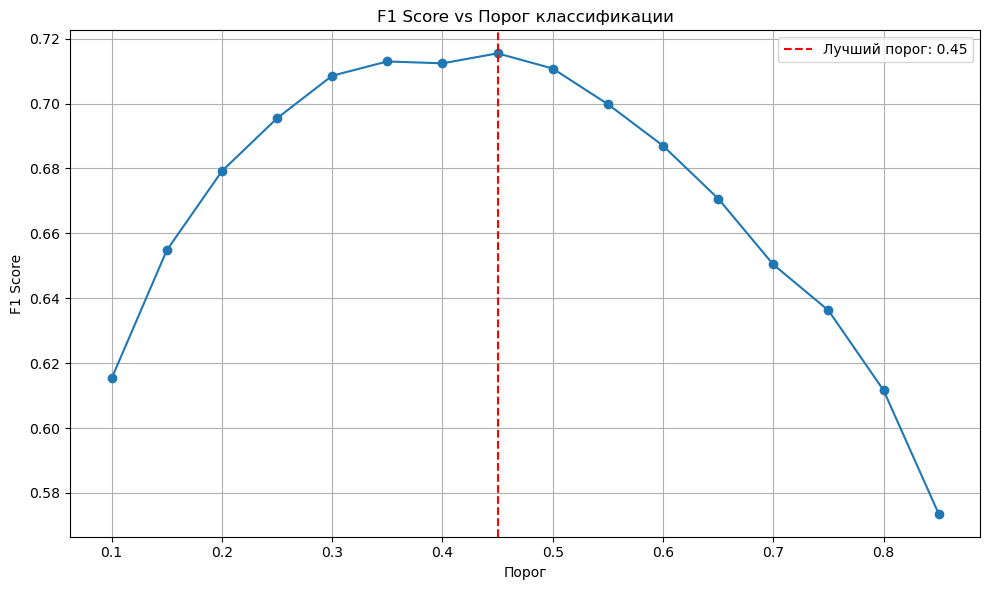

Test Accuracy (порог=0.45): 0.8949893390191898
Classification Report (порог=0.45):
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      4522
         1.0       0.77      0.67      0.72      1106

    accuracy                           0.89      5628
   macro avg       0.84      0.81      0.83      5628
weighted avg       0.89      0.89      0.89      5628



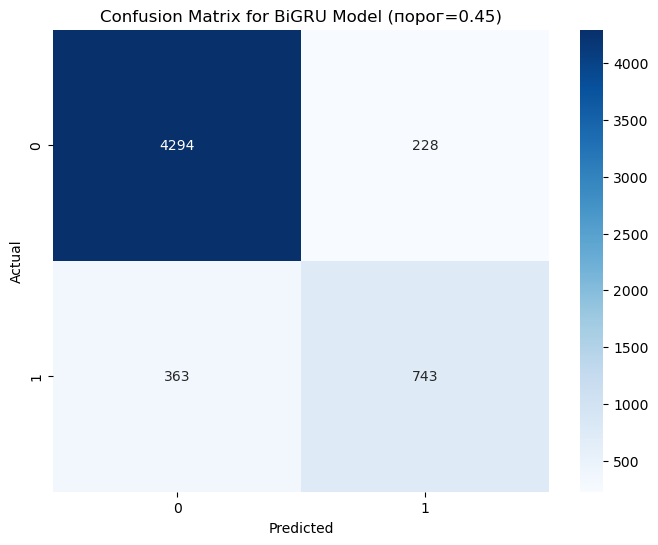

In [32]:
df_pd = churn_features_df.to_pandas()

# Define columns not used as features
exclude_cols = [
    "CHURN", "CLIENT_ID_SAP", "HAS_RECENT_INACTIVITY", "LATEST_TRANSACTION_DATE", "LAST_ACTIVE_MONTH", "MONTHS_SINCE_LAST_ACTIVITY",
    "ACTIVE_MONTHS", "MONTHS_AT_LEVEL", "CUSTOMER_TENURE_DAYS", "TOTAL_SPENT",
    "TOTAL_FUEL_LITERS", "TOTAL_TRANSACTIONS", "FUEL_TRANSACTIONS_COUNT", "LAST_TRANSACTION_DATE", "FIRST_ACTIVE_MONTH", "FIRST_TRANSACTION_DATE"
]
features_cols = [col for col in df_pd.columns if col not in exclude_cols]

# Separate features and target variable
X = df_pd[features_cols]
y = df_pd["CHURN"]

print(f"Features used: {features_cols}")
print(f"Shape of X: {X.shape}, shape of y: {y.shape}")

# Fill potential missing values with zeros
X = X.fillna(0)
y = y.fillna(0)

# Split data with stratification (80/20 train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Function to apply TruncatedSVD for dimensionality reduction
def apply_tsvd(X_train_df, X_test_df, n_components=None):
    if n_components is None:
        # Default to 80% of features or max 100 components
        n_components = min(int(X_train_df.shape[1] * 0.8), 100)
    
    # Ensure n_components does not exceed matrix dimensions (min of samples-1 or features)
    n_components = min(n_components, X_train_df.shape[0] - 1, X_train_df.shape[1])
    
    print(f"Applying TruncatedSVD with {n_components} components")
    tsvd = TruncatedSVD(n_components=n_components, random_state=42)
    X_train_tsvd = tsvd.fit_transform(X_train_df)
    X_test_tsvd = tsvd.transform(X_test_df)
    
    # Print explained variance
    explained_var = tsvd.explained_variance_ratio_.sum()
    print(f"Explained variance by {n_components} components: {explained_var:.4f}")
    
    return X_train_tsvd, X_test_tsvd, tsvd

# BiGRU Model Definition
class ChurnBiGRU(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=1, dropout=0.3):
        """
        input_size: number of features per time step (e.g., n_components from TSVD)
        hidden_size: size of GRU hidden state
        num_layers: number of GRU layers
        dropout: dropout rate after GRU layers
        """
        super(ChurnBiGRU, self).__init__()
        # Use a bidirectional GRU
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True, # expects input as (batch, seq, feature)
            bidirectional=True
        )
        # Dropout layer
        self.dropout = nn.Dropout(dropout)
        # Output layer: hidden state size will be hidden_size * 2 (due to bidirectionality)
        self.fc = nn.Linear(hidden_size * 2, 1)  # outputs logits for binary classification
        
    def forward(self, x):
        # x: [batch, seq_len, input_size]
        gru_out, _ = self.gru(x)  # gru_out: [batch, seq_len, hidden_size*2]
        # We take the output of the last time step
        last_output = gru_out[:, -1, :]  
        out = self.dropout(last_output)
        logits = self.fc(out)  # [batch, 1]
        return logits

# Training and Evaluation Functions
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for i, (inputs, labels) in enumerate(loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(inputs).squeeze(-1) # Squeeze to match label shape for BCEWithLogitsLoss
        if torch.isnan(logits).any():
            print(f"Batch {i}: logits contain NaN, skipping this batch.")
            continue
        loss = criterion(logits, labels.squeeze())
        if torch.isnan(loss):
            print(f"Batch {i}: loss is NaN, skipping this batch.")
            continue
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # Gradient clipping
        optimizer.step()
        total_loss += loss.item() * inputs.size(0)
    return total_loss / len(loader.dataset)

def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            logits = model(inputs).squeeze(-1)
            loss = criterion(logits, labels.squeeze())
            total_loss += loss.item() * inputs.size(0)
            preds = torch.sigmoid(logits)  # Return probabilities for AUC calculation
            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy().squeeze()) # Ensure labels are 1D
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    return total_loss / len(loader.dataset), all_preds, all_labels

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Optuna for Hyperparameter Optimization
def objective(trial):
    # Hyperparameters to optimize
    n_components = trial.suggest_int('n_components', 10, min(100, X_train.shape[1]-1)) # Ensure n_components < n_features
    hidden_size = trial.suggest_int('hidden_size', 20, 100)
    num_layers = trial.suggest_int('num_layers', 1, 3)
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    
    # Apply TSVD
    X_train_tsvd, X_test_tsvd, _ = apply_tsvd(X_train, X_test, n_components)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_tsvd)
    X_test_scaled = scaler.transform(X_test_tsvd)
    
    # If NaNs remain after scaling (e.g. from columns with zero variance), replace with zeros
    X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0)
    X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0)
    
    # Add a dummy sequence dimension (seq_len=1) for GRU input
    X_train_seq = np.expand_dims(X_train_scaled, axis=1)
    X_test_seq = np.expand_dims(X_test_scaled, axis=1)
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
    
    # Create DataLoaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Create the model
    model = ChurnBiGRU(
        input_size=n_components, # input_size is now n_components from TSVD
        hidden_size=hidden_size,
        num_layers=num_layers,
        dropout=dropout
    )
    model.to(device)
    
    # Loss function and optimizer
    criterion = nn.BCEWithLogitsLoss() # Handles sigmoid internally, more stable
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training with early stopping
    num_epochs = 30 # Max epochs for Optuna trial
    patience = 5    # Early stopping patience
    best_val_loss = float('inf')
    patience_counter = 0
    
    for epoch in range(num_epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer)
        val_loss, val_preds, val_labels = evaluate(model, test_loader, criterion)
        
        # Calculate AUC for monitoring
        val_auc = roc_auc_score(val_labels, val_preds)
        
        # Progress report
        if epoch % 5 == 0: # Log every 5 epochs
            print(f"Trial {trial.number}, Epoch {epoch+1}/{num_epochs} | "
                  f"Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f} | Val AUC: {val_auc:.4f}")
        
        # Early stopping logic
        if not np.isnan(val_loss) and val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Trial {trial.number}: Early stopping at epoch {epoch+1}")
                break
    
    # Final evaluation for this trial (using last epoch's validation performance)
    _, final_preds, final_labels = evaluate(model, test_loader, criterion)
    final_auc = roc_auc_score(final_labels, final_preds)
    
    return final_auc # Optuna will maximize this value

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20) # Number of trials for hyperparameter search

print("Best hyperparameters found:")
for key, value in study.best_params.items():
    print(f"    {key}: {value}")

# Train Final Model with Best Hyperparameters
best_params = study.best_params

# Apply TSVD with the best number of components
X_train_tsvd, X_test_tsvd, tsvd_model = apply_tsvd(X_train, X_test, best_params['n_components'])

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tsvd)
X_test_scaled = scaler.transform(X_test_tsvd)

# If NaNs remain after scaling, replace with zeros
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0)
X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0)

print("Are there NaNs in X_train_scaled after processing?", np.isnan(X_train_scaled).any())

# Add a dummy sequence dimension (seq_len=1) for GRU input
X_train_seq = np.expand_dims(X_train_scaled, axis=1)
X_test_seq = np.expand_dims(X_test_scaled, axis=1)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoaders
batch_size = best_params['batch_size']
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the final model with best parameters
final_model = ChurnBiGRU(
    input_size=best_params['n_components'],
    hidden_size=best_params['hidden_size'],
    num_layers=best_params['num_layers'],
    dropout=best_params['dropout']
)
final_model.to(device)
print("\nFinal Model Architecture:")
print(final_model)
total_params = sum(p.numel() for p in final_model.parameters() if p.requires_grad)
print("Total trainable parameters:", total_params)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])

# Training Loop with Early Stopping for the Final Model
num_epochs = 30 # Max epochs for final training, can be adjusted
patience = 5
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

print("\nStarting final model training...")
for epoch in range(num_epochs):
    train_loss = train_epoch(final_model, train_loader, criterion, optimizer)
    val_loss, val_preds, val_labels = evaluate(final_model, test_loader, criterion)
    val_auc = roc_auc_score(val_labels, val_preds)
    
    # Binary predictions with a 0.5 threshold for accuracy reporting during training
    val_binary_preds_05 = (val_preds > 0.5).astype(int)
    val_acc_05 = accuracy_score(val_labels, val_binary_preds_05)
    
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | "
          f"Val Loss: {val_loss:.6f} | Val Acc@0.5: {val_acc_05:.4f} | Val AUC: {val_auc:.4f}")
    
    if not np.isnan(val_loss) and val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = final_model.state_dict().copy() # Save the best model state
        patience_counter = 0
        print(f"New best validation loss: {best_val_loss:.6f}. Model saved.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1} due to no improvement in validation loss.")
            if best_model_state is not None:
                final_model.load_state_dict(best_model_state) # Load the best model
            break
if best_model_state is not None and patience_counter < patience : # Ensure best model is loaded if training finished before early stopping
    final_model.load_state_dict(best_model_state)
    print("Loaded best model state from training.")

# Final Evaluation with Optimal Threshold
final_model.eval() # Set model to evaluation mode
with torch.no_grad():
    _, test_preds, test_labels = evaluate(final_model, test_loader, criterion)

# Calculate AUC on the test set
auc_value = roc_auc_score(test_labels, test_preds)
print(f"\nFinal Test AUC: {auc_value:.4f}")

# Find the optimal classification threshold based on F1-score
print("\nSearching for optimal classification threshold on test set...")
thresholds_range = np.arange(0.1, 0.9, 0.05) # Define a range of thresholds to test
f1_scores_list = []

for th in thresholds_range:
    test_binary_preds_th = (test_preds > th).astype(int)
    f1 = f1_score(test_labels, test_binary_preds_th)
    f1_scores_list.append(f1)
    print(f"Threshold: {th:.2f}, F1 Score: {f1:.4f}")

# Find threshold with the best F1 score from the tested range
best_threshold_idx_manual = np.argmax(f1_scores_list)
best_threshold_manual = thresholds_range[best_threshold_idx_manual]
best_f1_manual = f1_scores_list[best_threshold_idx_manual]

print(f"\nOptimal threshold (manual search): {best_threshold_manual:.2f} with F1 Score: {best_f1_manual:.4f}")

# Alternative approach: using precision-recall curve to find optimal threshold
precision, recall, pr_thresholds_curve = precision_recall_curve(test_labels, test_preds)
# F1 score for each threshold from PR curve (add epsilon to avoid division by zero)
f1_scores_pr_curve = 2 * (precision * recall) / (precision + recall + 1e-10) 

# Find threshold with the best F1 score from PR curve
# Note: pr_thresholds_curve has one less element than precision/recall/f1_scores_pr_curve
best_idx_pr = np.argmax(f1_scores_pr_curve[:-1]) # Exclude the last F1 score which might be for a non-existent threshold
best_threshold_pr = pr_thresholds_curve[best_idx_pr] if best_idx_pr < len(pr_thresholds_curve) else 0.5 # Fallback if index is out of bounds

print(f"Optimal threshold from PR curve: {best_threshold_pr:.4f} with F1 Score: {f1_scores_pr_curve[best_idx_pr]:.4f}")

# Choose the best threshold (e.g., from PR curve as it's more systematic)
# For this example, let's stick to the manually searched one if it's better or PR if not.
# Or simply pick one method. Let's use the PR curve threshold.
best_threshold = best_threshold_pr 
print(f"Using threshold: {best_threshold:.4f} for final metrics.")


# Visualize F1 scores vs thresholds (from manual search)
plt.figure(figsize=(10, 6))
plt.plot(thresholds_range, f1_scores_list, marker='o', label='F1 Score (Manual Search)')
plt.plot(pr_thresholds_curve, f1_scores_pr_curve[:-1], marker='.', linestyle='--', label='F1 Score (PR Curve)')
plt.axvline(x=best_threshold, color='r', linestyle=':', label=f'Selected Best Threshold: {best_threshold:.4f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Classification Threshold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Use the chosen optimal threshold for final predictions
test_binary_preds_final = (test_preds > best_threshold).astype(int)

# Final evaluation metrics with the optimal threshold
print(f"\nTest Accuracy (threshold={best_threshold:.4f}): {accuracy_score(test_labels, test_binary_preds_final):.4f}")
print(f"Classification Report (threshold={best_threshold:.4f}):\n", classification_report(test_labels, test_binary_preds_final))

# Confusion Matrix
cm = confusion_matrix(test_labels, test_binary_preds_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix for BiGRU Model (threshold={best_threshold:.4f})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# BiGRU Hyperparameter Optimization using Genetic Algorithm and TSVD

Запуск BiGRU модели с TSVD и генетическим алгоритмом для предсказания оттока на основе churn_features_df
Используемые признаки: ['HAS_EMAIL', 'HAS_SMS', 'HAS_VKL', 'AVG_TRANSACTION_VALUE', 'NON_FUEL_TRANSACTIONS_COUNT', 'TRANSACTION_COUNT_VOLATILITY', 'AVG_MONTHLY_TRANSACTIONS', 'LAST_MONTH_TRANSACTIONS', 'LAST_MONTH_SPENT', 'LAST_MONTH_FUEL_TRANS', 'LAST_3M_TRANSACTION_COUNT', 'LAST_3M_TOTAL_SPENT', 'LAST_3M_AVG_TRANSACTION', 'LAST_3M_AVG_TRANSACTIONS', 'LAST_3M_AVG_SPENT', 'RECENT_TRANSACTION_TREND', 'RECENT_SPENDING_TREND', 'AVG_GAP_BETWEEN_ACTIVE_MONTHS', 'MAX_GAP_BETWEEN_ACTIVE_MONTHS', 'MONTHLY_ACTIVITY_DENSITY', 'RECENT_VS_HISTORICAL_ACTIVITY', 'RECENT_VS_HISTORICAL_SPENDING', 'PERCENT_TRANSACTION_TREND', 'PERCENT_SPENDING_TREND', 'IS_NEW_CUSTOMER', 'IS_MID_TENURE_CUSTOMER', 'IS_ESTABLISHED_CUSTOMER', 'TREND_RELIABILITY', 'NORMALIZED_VOLATILITY', 'LAST_MONTH_TRANSACTIONS_Z_SCORE', 'HAS_IRREGULAR_ACTIVITY', 'IS_CONSISTENT_CUSTOMER', 'MAX_RECENT_INACTIVITY_PERIOD', 'FUEL_TRANSACTI

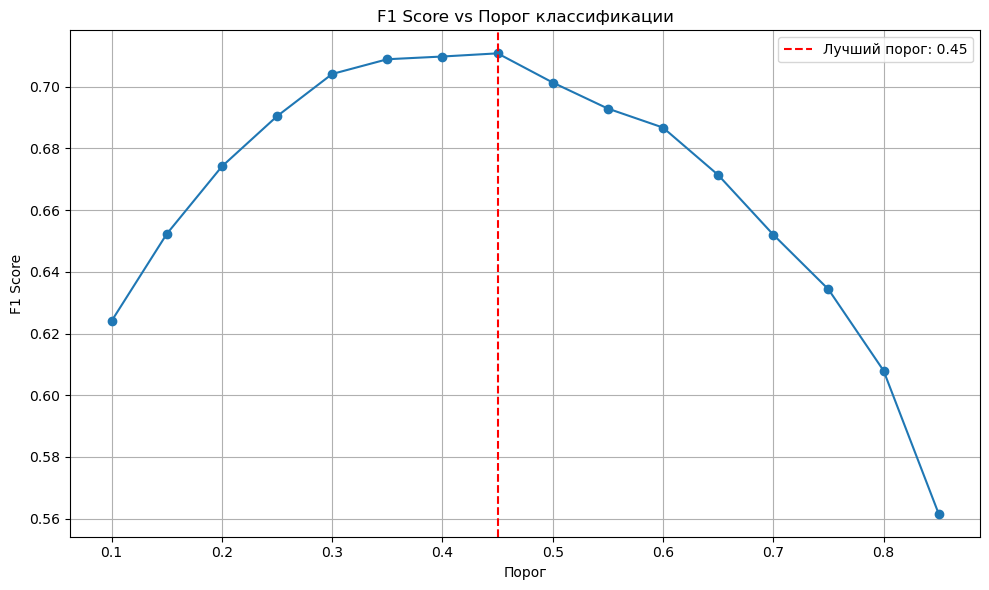

Test Accuracy (порог=0.45): 0.8928571428571429
Classification Report (порог=0.45):
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      4522
         1.0       0.76      0.67      0.71      1106

    accuracy                           0.89      5628
   macro avg       0.84      0.81      0.82      5628
weighted avg       0.89      0.89      0.89      5628



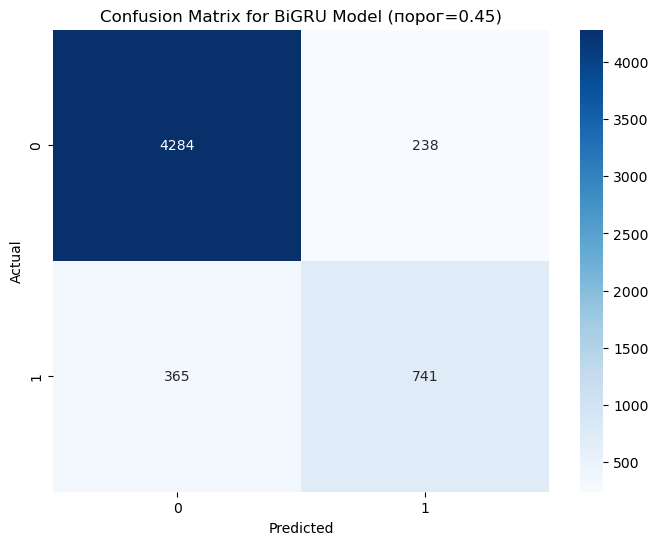

In [31]:
df_pd = churn_features_df.to_pandas()

# Define columns not used as features.
exclude_cols = [
    "CHURN", "CLIENT_ID_SAP", "HAS_RECENT_INACTIVITY", "LATEST_TRANSACTION_DATE", "LAST_ACTIVE_MONTH", "MONTHS_SINCE_LAST_ACTIVITY",
    "ACTIVE_MONTHS", "MONTHS_AT_LEVEL", "CUSTOMER_TENURE_DAYS", "TOTAL_SPENT",
    "TOTAL_FUEL_LITERS", "TOTAL_TRANSACTIONS", "FUEL_TRANSACTIONS_COUNT", "LAST_TRANSACTION_DATE", "FIRST_ACTIVE_MONTH", "FIRST_TRANSACTION_DATE"
]
features_cols = [col for col in df_pd.columns if col not in exclude_cols]

# Separate features and target variable
X = df_pd[features_cols]
y = df_pd["CHURN"]

print(f"Features used: {features_cols}")
print(f"Shape of X: {X.shape}, shape of y: {y.shape}")

# Fill potential missing values with zeros
X = X.fillna(0)
y = y.fillna(0)

# Split data with stratification (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply TruncatedSVD for dimensionality reduction
def apply_tsvd(X_train, X_test, n_components=None):
    if n_components is None:
        # Default to 80% of features or max 100
        n_components = min(int(X_train.shape[1] * 0.8), 100)
    
    # Ensure n_components does not exceed the minimum of matrix dimensions (or n_samples - 1 for some implementations)
    n_components = min(n_components, X_train.shape[0] - 1, X_train.shape[1]) # Ensure n_components is valid
    
    print(f"Applying TruncatedSVD with {n_components} components")
    tsvd = TruncatedSVD(n_components=n_components, random_state=42)
    X_train_tsvd = tsvd.fit_transform(X_train)
    X_test_tsvd = tsvd.transform(X_test)
    
    # Print explained variance
    explained_var = tsvd.explained_variance_ratio_.sum()
    print(f"Explained variance: {explained_var:.4f}")
    
    return X_train_tsvd, X_test_tsvd, tsvd

# BiGRU Model Definition
class ChurnBiGRU(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=1, dropout=0.3):
        """
        input_size: number of features per time step (e.g., len(features_cols))
        hidden_size: size of GRU hidden state
        num_layers: number of GRU layers
        dropout: dropout rate after GRU
        """
        super(ChurnBiGRU, self).__init__()
        # Use bidirectional GRU
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True
        )
        # Output layer: hidden state will have size hidden_size * 2 (due to bidirectionality)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size * 2, 1)  # logits for binary classification
        
    def forward(self, x):
        # x: [batch, seq_len, input_size]
        gru_out, _ = self.gru(x)  # gru_out: [batch, seq_len, hidden_size*2]
        last_output = gru_out[:, -1, :]  # last time step output
        out = self.dropout(last_output)
        logits = self.fc(out)  # [batch, 1]
        return logits

# Training and Evaluation Functions
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for i, (inputs, labels) in enumerate(loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(inputs).squeeze(-1)
        if torch.isnan(logits).any():
            print(f"Batch {i}: logits contain NaN, skipping this batch.")
            continue
        loss = criterion(logits, labels.squeeze())
        if torch.isnan(loss):
            print(f"Batch {i}: loss is NaN, skipping this batch.")
            continue
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # Gradient clipping
        optimizer.step()
        total_loss += loss.item() * inputs.size(0)
    return total_loss / len(loader.dataset)

def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            logits = model(inputs).squeeze(-1)
            loss = criterion(logits, labels.squeeze())
            total_loss += loss.item() * inputs.size(0)
            preds = torch.sigmoid(logits)  # Return probabilities, not binary labels
            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    return total_loss / len(loader.dataset), all_preds, all_labels

# Device Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Check for CUDA availability
print("Using device:", device)

# Genetic Algorithm for Hyperparameter Optimization
# Create types for the genetic algorithm (using DEAP library)
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) # Maximize fitness (e.g., AUC)
creator.create("Individual", list, fitness=creator.FitnessMax)

# Function to evaluate an individual (a set of hyperparameters)
def evaluate_individual(individual):
    # Convert individual (list) to hyperparameters
    n_components = individual[0]
    hidden_size = individual[1]
    num_layers = individual[2]
    dropout = individual[3]
    learning_rate = individual[4]
    batch_size = individual[5]
    
    print(f"Evaluating individual: n_components={n_components}, hidden_size={hidden_size}, "
          f"num_layers={num_layers}, dropout={dropout:.3f}, lr={learning_rate:.6f}, batch_size={batch_size}")
    
    try:
        # Apply TSVD
        X_train_tsvd, X_test_tsvd, _ = apply_tsvd(X_train.copy(), X_test.copy(), n_components) # Use copies to avoid modifying original data
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_tsvd)
        X_test_scaled = scaler.transform(X_test_tsvd)
        
        # If NaNs remain after scaling, replace with zeros (can happen with zero variance columns after TSVD)
        X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0)
        X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0)
        
        # Add a dummy sequence dimension (seq_len=1) for GRU input
        X_train_seq = np.expand_dims(X_train_scaled, axis=1)
        X_test_seq = np.expand_dims(X_test_scaled, axis=1)
        
        # Convert to PyTorch tensors
        X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
        y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
        
        # Create DataLoaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
        
        # Initialize model
        model = ChurnBiGRU(
            input_size=n_components, # Input size is now number of TSVD components
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout
        )
        model.to(device)
        
        # Define loss function and optimizer
        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Train the model with early stopping
        num_epochs = 20  # Reduced for faster genetic algorithm execution
        patience = 3
        best_val_loss = float('inf')
        patience_counter = 0
        
        for epoch in range(num_epochs):
            train_loss = train_epoch(model, train_loader, criterion, optimizer)
            val_loss, val_preds, val_labels = evaluate(model, test_loader, criterion)
            
            # Calculate AUC for validation monitoring
            if len(np.unique(val_labels)) > 1: # AUC requires at least two classes
                 val_auc = roc_auc_score(val_labels, val_preds)
            else:
                 val_auc = 0.0 # Or handle as appropriate if only one class in batch/validation
            
            # Progress report during training
            if epoch % 5 == 0:
                print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | "
                      f"Val Loss: {val_loss:.6f} | Val AUC: {val_auc:.4f}")
            
            # Early stopping check
            if not np.isnan(val_loss) and val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    break
        
        # Final evaluation on the test set for this individual
        _, final_preds, final_labels = evaluate(model, test_loader, criterion)
        if len(np.unique(final_labels)) > 1:
            final_auc = roc_auc_score(final_labels, final_preds)
        else:
            final_auc = 0.0

        print(f"Individual finished training with AUC: {final_auc:.4f}")
        return (final_auc,) # Return as a tuple, as DEAP expects
    
    except Exception as e:
        print(f"Error evaluating individual: {e}")
        return (0.0,)  # Return minimal fitness in case of error

# Create tools for the genetic algorithm
toolbox = base.Toolbox()

# Define hyperparameter ranges/options
n_components_range = (10, min(100, X_train.shape[1] -1 if X_train.shape[1] > 1 else 10)) # Ensure n_components < n_features
hidden_size_range = (20, 100)
num_layers_range = (1, 3)
dropout_range = (0.1, 0.5)
learning_rate_range = (0.0001, 0.01)
batch_size_options = [32, 64, 128]

# Functions to generate random hyperparameter values
def random_n_components():
    return random.randint(n_components_range[0], n_components_range[1])

def random_hidden_size():
    return random.randint(hidden_size_range[0], hidden_size_range[1])

def random_num_layers():
    return random.randint(num_layers_range[0], num_layers_range[1])

def random_dropout():
    return random.uniform(dropout_range[0], dropout_range[1])

def random_learning_rate():
    return random.uniform(learning_rate_range[0], learning_rate_range[1])

def random_batch_size():
    return random.choice(batch_size_options)

# Register functions in the toolbox for generating attributes
toolbox.register("attr_n_components", random_n_components)
toolbox.register("attr_hidden_size", random_hidden_size)
toolbox.register("attr_num_layers", random_num_layers)
toolbox.register("attr_dropout", random_dropout)
toolbox.register("attr_learning_rate", random_learning_rate)
toolbox.register("attr_batch_size", random_batch_size)

# Create individual and population structures
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_n_components, toolbox.attr_hidden_size, 
                  toolbox.attr_num_layers, toolbox.attr_dropout,
                  toolbox.attr_learning_rate, toolbox.attr_batch_size), n=1) # n=1 for one cycle of attributes
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register genetic algorithm operators
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)  # Crossover
toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)  # Mutation (placeholder, will be replaced)
toolbox.register("select", tools.selTournament, tournsize=3)  # Selection

# Custom mutation function considering types and ranges for each hyperparameter
def custom_mutate(individual, indpb):
    for i in range(len(individual)):
        if random.random() < indpb: # indpb is the probability of mutating an attribute
            if i == 0:  # n_components
                individual[i] = random_n_components()
            elif i == 1:  # hidden_size
                individual[i] = random_hidden_size()
            elif i == 2:  # num_layers
                individual[i] = random_num_layers()
            elif i == 3:  # dropout
                individual[i] = random_dropout()
            elif i == 4:  # learning_rate
                individual[i] = random_learning_rate()
            elif i == 5:  # batch_size
                individual[i] = random_batch_size()
    return individual, # DEAP mutation functions must return a tuple of one individual

# Replace standard mutation with our custom one
toolbox.register("mutate", custom_mutate, indpb=0.2) # indpb is the probability for each attribute to be mutated

# Run the genetic algorithm
population_size = 10
generations = 5 # Number of generations to run
print(f"Starting genetic algorithm with population size {population_size} for {generations} generations")

population = toolbox.population(n=population_size)
hof = tools.HallOfFame(1)  # Store the best individual found

# Statistics to track progress
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

# Run the evolutionary algorithm
population, logbook = algorithms.eaSimple(population, toolbox, 
                                         cxpb=0.5, # Crossover probability
                                         mutpb=0.2, # Mutation probability
                                         ngen=generations, 
                                         stats=stats, 
                                         halloffame=hof,
                                         verbose=True)

# Get the best hyperparameters found by the GA
best_individual = hof[0]
best_params = {
    'n_components': best_individual[0],
    'hidden_size': best_individual[1],
    'num_layers': best_individual[2],
    'dropout': best_individual[3],
    'learning_rate': best_individual[4],
    'batch_size': best_individual[5]
}

print("Best hyperparameters found:")
for key, value in best_params.items():
    print(f"    {key}: {value}")

# Final Model Training with Best Hyperparameters
# Apply TSVD with the best number of components
X_train_tsvd, X_test_tsvd, tsvd = apply_tsvd(X_train.copy(), X_test.copy(), best_params['n_components'])

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tsvd)
X_test_scaled = scaler.transform(X_test_tsvd)

# If NaNs remain after scaling, replace with zeros
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0)
X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0)

print("Are there NaNs in X_train_scaled after final processing?", np.isnan(X_train_scaled).any())

# Add a dummy sequence dimension (seq_len=1)
X_train_seq = np.expand_dims(X_train_scaled, axis=1)
X_test_seq = np.expand_dims(X_test_scaled, axis=1)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoaders for the final model
batch_size = best_params['batch_size']
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the final model with optimized hyperparameters
final_model = ChurnBiGRU(
    input_size=best_params['n_components'],
    hidden_size=best_params['hidden_size'],
    num_layers=best_params['num_layers'],
    dropout=best_params['dropout']
)
final_model.to(device)
print("\nFinal Model Architecture:")
print(final_model)
total_params = sum(p.numel() for p in final_model.parameters() if p.requires_grad) # Count trainable parameters
print("Total trainable parameters:", total_params)

# Loss and optimizer for the final model
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])

# Training Loop with Early Stopping for the final model
num_epochs = 30 # More epochs for final training
patience = 5    # Patience for early stopping
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

print("\nStarting final model training...")
for epoch in range(num_epochs):
    train_loss = train_epoch(final_model, train_loader, criterion, optimizer)
    val_loss, val_preds, val_labels = evaluate(final_model, test_loader, criterion)
    
    if len(np.unique(val_labels)) > 1:
        val_auc = roc_auc_score(val_labels, val_preds)
    else:
        val_auc = 0.0
    
    # Binary predictions with threshold 0.5 for accuracy reporting during training
    val_binary_preds_temp = (val_preds > 0.5).astype(int)
    val_acc = accuracy_score(val_labels, val_binary_preds_temp)
    
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | "
          f"Val Loss: {val_loss:.6f} | Val Acc: {val_acc:.4f} | Val AUC: {val_auc:.4f}")
    
    if not np.isnan(val_loss) and val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = final_model.state_dict().copy() # Save the best model state
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            if best_model_state is not None:
                final_model.load_state_dict(best_model_state) # Load the best model state
            break
# Ensure the best model is loaded if training finished due to num_epochs but a better one was found earlier
if best_model_state is not None and patience_counter < patience :
    final_model.load_state_dict(best_model_state)


# Final Evaluation with Optimal Threshold
final_model.eval() # Set model to evaluation mode
with torch.no_grad(): # Disable gradient calculations
    _, test_preds, test_labels = evaluate(final_model, test_loader, criterion)

# Calculate AUC
if len(np.unique(test_labels)) > 1:
    auc_value = roc_auc_score(test_labels, test_preds)
else:
    auc_value = 0.0
print(f"\nFinal Test AUC: {auc_value:.4f}")

# Find the optimal classification threshold using F1-score
print("\nSearching for optimal classification threshold on test data...")
thresholds_range_search = np.arange(0.1, 0.9, 0.05) # Range of thresholds to test
f1_scores_list = []

for threshold_val in thresholds_range_search:
    test_binary_preds_loop = (test_preds > threshold_val).astype(int)
    f1 = f1_score(test_labels, test_binary_preds_loop)
    f1_scores_list.append(f1)
    print(f"Threshold: {threshold_val:.2f}, F1 Score: {f1:.4f}")

# Find threshold with the best F1 score from manual search
best_threshold_idx_manual = np.argmax(f1_scores_list)
best_threshold_manual = thresholds_range_search[best_threshold_idx_manual]
best_f1_manual = f1_scores_list[best_threshold_idx_manual]

print(f"\nOptimal threshold (manual search): {best_threshold_manual:.2f} with F1 Score: {best_f1_manual:.4f}")

# Alternative approach using precision-recall curve to find optimal threshold
precision_pr, recall_pr, pr_thresholds_curve = precision_recall_curve(test_labels, test_preds)

# Calculate F1 score for each threshold from PR curve (add epsilon to avoid division by zero)
f1_scores_pr_curve = 2 * (precision_pr * recall_pr) / (precision_pr + recall_pr + 1e-10) 

# Find threshold with the best F1 score from PR curve
# Note: pr_thresholds_curve has one less element than f1_scores_pr_curve
best_idx_pr = np.argmax(f1_scores_pr_curve[:-1]) # Exclude the last F1 score which might be for a non-existent threshold
best_threshold_pr_curve = pr_thresholds_curve[best_idx_pr] if best_idx_pr < len(pr_thresholds_curve) else 0.5 # Fallback if index is out of bounds

print(f"Optimal threshold from PR curve: {best_threshold_pr_curve:.4f} with F1 Score: {f1_scores_pr_curve[best_idx_pr]:.4f}")

# Choose the best threshold (e.g., from PR curve as it's often more robust)
best_threshold = best_threshold_pr_curve 
print(f"Using threshold: {best_threshold:.4f} for final metrics.")


# Visualize F1 scores vs thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds_range_search, f1_scores_list, marker='o', label='F1 Score (Manual Search)')
# Plot F1 from PR curve, pr_thresholds might not align perfectly with the manual search range
# For simplicity, we'll plot the manual search and mark the selected best_threshold
plt.plot(pr_thresholds_curve, f1_scores_pr_curve[:-1], marker='.', linestyle='--', label='F1 Score (PR Curve)')
plt.axvline(x=best_threshold, color='r', linestyle=':', label=f'Selected Best Threshold: {best_threshold:.4f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Classification Threshold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Use the chosen optimal threshold for final predictions
test_binary_preds_final = (test_preds > best_threshold).astype(int)

# Final evaluation metrics with the optimal threshold
print(f"\nTest Accuracy (threshold={best_threshold:.4f}): {accuracy_score(test_labels, test_binary_preds_final):.4f}")
print(f"Classification Report (threshold={best_threshold:.4f}):\n", classification_report(test_labels, test_binary_preds_final))

# Confusion Matrix
cm = confusion_matrix(test_labels, test_binary_preds_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix for BiGRU Model (threshold={best_threshold:.4f})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
